In [1]:
import pandas as pd
import random as rn
import numpy as np

# Визуализация
%matplotlib inline
import matplotlib.pyplot as plt

# модели
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Метрики
from sklearn.metrics import mean_squared_log_error, r2_score, root_mean_squared_log_error, mean_squared_error


In [2]:
# загрзка обучающего датасета
data_train = pd.read_csv("train.csv")

In [3]:
print(data_train.shape)

(30471, 292)


In [4]:
# отображение всех столбцов
pd.options.display.max_columns = 500
data_train.head()

id   timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1   2  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2   3  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3   4  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4   5  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   

   num_room  kitch_sq  state product_type           sub_area        area_m  \
0       NaN       NaN    NaN   Investment           Bibirevo  6.407578e+06   
1       NaN       NaN    NaN   Investment  Nagatinskij Zaton  9.589337e+06   
2       NaN       NaN    NaN   Investment     Tekstil'shhiki  4.808270e+06   
3       NaN       NaN    NaN   Investment             Mitino  1.258354e+07   
4       NaN       NaN    NaN   Investment          Basmannoe  8.398461e+06   

   raion_popul  green_zone_part  indust_part  children_preschool  \
0       155572         0.189727     0.000070                9576   
1       115352         0.372602     0.049637                6880   
2       101708         0.112560     0.118537                5879   
3       178473         0.194703     0.069753               13087   
4       108171         0.015234     0.037316                5706   

   preschool_quota  preschool_education_centers_raion  children_school  \
0           5001.0                                  5            10309   
1           3119.0                                  5             7759   
2           1463.0                                  4             6207   
3           6839.0                                  9            13670   
4           3240.0                                  7             6748   

   school_quota  school_education_centers_raion  \
0       11065.0                               5   
1        6237.0                               8   
2        5580.0                               7   
3       17063.0                              10   
4        7770.0                               9   

   school_education_centers_top_20_raion  hospital_beds_raion  \
0                                      0                240.0   
1                                      0                229.0   
2                                      0               1183.0   
3                                      0                  NaN   
4                                      0                562.0   

   healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
0                         1                        0                    7   
1                         1                        0                    6   
2                         1                        0                    5   
3                         1                        0                   17   
4                         4                        2                   25   

   additional_education_raion culture_objects_top_25  \
0                           3                     no   
1                           1                    yes   
2                           1                     no   
3                           6                     no   
4                           2                     no   

   culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
0                             0                      16             1   
1                             1                       3             0   
2                             0                       0             1   
3                             0                      11             4   
4                             0                      10            93   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  no   
2                        no                 no            

### Выбор столбцов (признаков) для предсказания

price_doc: цена продажи (это целевая переменная)

full_sq: общая площадь в квадратных метрах, включая лоджии, балконы и другие нежилые помещения

life_sq: жилая площадь в квадратных метрах, за исключением лоджий, балконов и других нежилых помещений

floor: для квартир, этаж здания

max_floor: количество этажей в

material: материал стен

build_year: год постройки

num_room: количество жилых комнат

kitch_sq: площадь кухни

state: состояние квартиры 

product_type: покупка для частного использования или инвестиция

sub_area: название района

metro_km_walk:	Расстояние до метро

park_km:	Расстояние до парка

sadovoe_km:	Расстояние до Садового кольца

kremlin_km:	Расстояние до центра города (Кремля)

oil_chemistry_raion:	Наличие грязных производств

shopping_centers_raion:	Количество торговых центров в округе

healthcare_centers_raion:	Количество медицинских центров в округе

school_education_centers_raion:	Количество средних учебных заведений

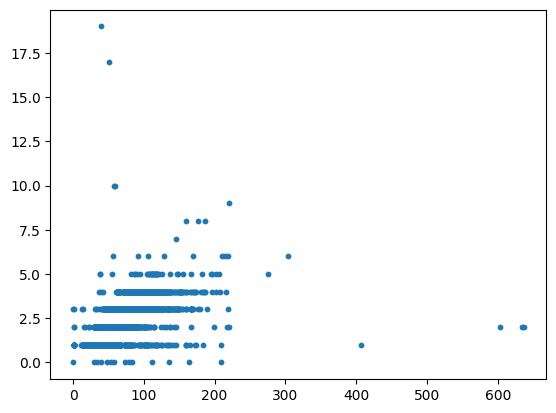

In [5]:
# сначала проверим на выбросы количество комнат
plt.scatter(data_train['full_sq'],data_train['num_room'],s=10)

из графика видно, что больше 10 комнат выбросы

In [6]:
# сначала заменим пропущенные значения на ноль
data_train['num_room'] = data_train['num_room'].fillna(0)
print(data_train['num_room'].isnull().sum())

0


In [7]:
data_train['num_room'] = data_train['num_room'].astype(int)

In [8]:
data_train['num_room'].unique()

array([ 0,  2,  1,  3,  4,  5,  6, 19, 10,  8,  7, 17,  9])

In [9]:
data_train[data_train['num_room']<10]

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0          1  2011-08-20       43     27.0    4.0        NaN       NaN   
1          2  2011-08-23       34     19.0    3.0        NaN       NaN   
2          3  2011-08-27       43     29.0    2.0        NaN       NaN   
3          4  2011-09-01       89     50.0    9.0        NaN       NaN   
4          5  2011-09-05       77     77.0    4.0        NaN       NaN   
...      ...         ...      ...      ...    ...        ...       ...   
30466  30469  2015-06-30       44     27.0    7.0        9.0       1.0   
30467  30470  2015-06-30       86     59.0    3.0        9.0       2.0   
30468  30471  2015-06-30       45      NaN   10.0       20.0       1.0   
30469  30472  2015-06-30       64     32.0    5.0       15.0       1.0   
30470  30473  2015-06-30       43     28.0    1.0        9.0       1.0   

       build_year  num_room  kitch_sq  state   product_type  \
0             NaN         0       NaN    NaN     Investment   
1             NaN         0       NaN    NaN     Investment   
2             NaN         0       NaN    NaN     Investment   
3             NaN         0       NaN    NaN     Investment   
4             NaN         0       NaN    NaN     Investment   
...           ...       ...       ...    ...            ...   
30466      1975.0         2       6.0    3.0     Investment   
30467      1935.0         4      10.0    3.0     Investment   
30468         NaN         1       1.0    1.0  OwnerOccupier   
30469      2003.0         2      11.0    2.0     Investment   
30470      1968.0         2       6.0    2.0     Investment   

                   sub_area        area_m  raion_popul  green_zone_part  \
0                  Bibirevo  6.407578e+06       155572         0.189727   
1         Nagatinskij Zaton  9.589337e+06       115352         0.372602   
2            Tekstil'shhiki  4.808270e+06       101708         0.112560   
3                    Mitino  1.258354e+07       178473         0.194703   
4                 Basmannoe  8.398461e+06       108171         0.015234   
...                     ...           ...          ...              ...   
30466              Otradnoe  1.005305e+07       175518         0.096270   
30467              Tverskoe  7.307411e+06        75377         0.065444   
30468  Poselenie Vnukovskoe  2.553630e+07         4001         0.496315   
30469          Obruchevskoe  6.050065e+06        78616         0.167526   
30470           Novogireevo  4.395333e+06        94561         0.063755   

       indust_part  children_preschool  preschool_quota  \
0         0.000070                9576           5001.0   
1         0.049637                6880           3119.0   
2         0.118537                5879           1463.0   
3         0.069753               13087           6839.0   
4         0.037316                5706           3240.0   
...            ...                 ...              ...   
30466     0.300323                9753           5088.0   
30467     0.000078                4237           1874.0   
30468     0.007122                 275              NaN   
30469     0.093443                4215           2372.0   
30470     0.038693                6120           2215.0   

       preschool_education_centers_raion  children_school  school_quota  \
0                                      5            10309       11065.0   
1                                      5             7759        6237.0   
2                                      4             6207        5580.0   
3                                      9            13670       17063.0   
4                                      7             6748        7770.0   
...                                  ...              ...           ...   
30466                                  4            10311       12721.0   
30467                                  4             6398        6772.0   
30468                                  0              264           NaN   
3046

In [10]:
data_train = data_train[(data_train['num_room']!=10) & (data_train['num_room']!=17) & (data_train['num_room']!=19)]
print(len(data_train))

30467


In [11]:
# проверим на ноль общую площадь
data_train[data_train['full_sq']<=0]

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
17932  17935  2014-04-28        0      0.0    0.0        0.0       1.0   
24296  24299  2014-11-05        0     77.0    4.0       17.0       1.0   

       build_year  num_room  kitch_sq  state   product_type  \
17932         0.0         0       0.0    1.0  OwnerOccupier   
24296         0.0         3       0.0    1.0  OwnerOccupier   

                      sub_area       area_m  raion_popul  green_zone_part  \
17932  Poselenie Voskresenskoe  21494094.80         7122         0.262459   
24296     Poselenie Vnukovskoe  25536296.81         4001         0.496315   

       indust_part  children_preschool  preschool_quota  \
17932     0.017647                 489              NaN   
24296     0.007122                 275              NaN   

       preschool_education_centers_raion  children_school  school_quota  \
17932                                  0              469           NaN   
24296                                  0              264           NaN   

       school_education_centers_raion  school_education_centers_top_20_raion  \
17932                               0                                      0   
24296                               0                                      0   

       hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
17932                  NaN                         0                        0   
24296                  NaN                         0                        0   

       sport_objects_raion  additional_education_raion culture_objects_top_25  \
17932                    0                           2                     no   
24296                    0                           0                     no   

       culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
17932                             0                       0             0   
24296                             0                       1             0   

      thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
17932                        no                 no                  no   
24296                        no                 no                  no   

      radiation_raion railroad_terminal_raion big_market_raion  \
17932              no                      no               no   
24296              no                      no               no   

      nuclear_reactor_raion detention_facility_raion  full_all  male_f  \
17932                    no                       no      9553    4529   
24296                    no                       no     17790    8350   

       female_f  young_all  young_male  young_female  work_all  work_male  \
17932      5024       1021         529           493      4568       2414   
24296      9443        574         297           277      2566       1356   

       work_female  ekder_all  ekder_male  ekder_female  0_6_all  0_6_male  \
17932         2155       1533         435          1099      489       254   
24296         1211        861         244           617      275       143   

       0_6_female  7_14_all  7_14_male  7_14_female  0_17_all  0_17_male  \
17932         236       469        242          228      1150        597   
24296         133       264        136          128       646        336   

       0_17_female  16_29_all  16_29_male  16_29_female  0_13_all  0_13_male  \
17932          553       2155        1206           950       900        465   
24296          311       3796        2035          1762       506        261   

       0_13_female  raion_build_count_with_material_info  build_count_block  \
17932          435                                   NaN                NaN   
24296          245                                   NaN                NaN   

       build_count_wood  build_count_frame  build_count_brick  \
17932               NaN                NaN                NaN   
24296               NaN                NaN        

In [12]:
data_train = data_train[data_train['full_sq']!=0]
print(len(data_train))

30465


In [13]:
# посчитаем средний процент комнат, чтобы в дальнейшем заполнить пропущенные значения в комнатах
data_train_d = data_train[data_train['num_room']>0]#/data_train['full_sq'][data_train['num_room']>0]
d = data_train_d['num_room']/data_train_d['full_sq']
r_d = d.mean()
r_d

0.03646000223164346

In [14]:
data_train

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0          1  2011-08-20       43     27.0    4.0        NaN       NaN   
1          2  2011-08-23       34     19.0    3.0        NaN       NaN   
2          3  2011-08-27       43     29.0    2.0        NaN       NaN   
3          4  2011-09-01       89     50.0    9.0        NaN       NaN   
4          5  2011-09-05       77     77.0    4.0        NaN       NaN   
...      ...         ...      ...      ...    ...        ...       ...   
30466  30469  2015-06-30       44     27.0    7.0        9.0       1.0   
30467  30470  2015-06-30       86     59.0    3.0        9.0       2.0   
30468  30471  2015-06-30       45      NaN   10.0       20.0       1.0   
30469  30472  2015-06-30       64     32.0    5.0       15.0       1.0   
30470  30473  2015-06-30       43     28.0    1.0        9.0       1.0   

       build_year  num_room  kitch_sq  state   product_type  \
0             NaN         0       NaN    NaN     Investment   
1             NaN         0       NaN    NaN     Investment   
2             NaN         0       NaN    NaN     Investment   
3             NaN         0       NaN    NaN     Investment   
4             NaN         0       NaN    NaN     Investment   
...           ...       ...       ...    ...            ...   
30466      1975.0         2       6.0    3.0     Investment   
30467      1935.0         4      10.0    3.0     Investment   
30468         NaN         1       1.0    1.0  OwnerOccupier   
30469      2003.0         2      11.0    2.0     Investment   
30470      1968.0         2       6.0    2.0     Investment   

                   sub_area        area_m  raion_popul  green_zone_part  \
0                  Bibirevo  6.407578e+06       155572         0.189727   
1         Nagatinskij Zaton  9.589337e+06       115352         0.372602   
2            Tekstil'shhiki  4.808270e+06       101708         0.112560   
3                    Mitino  1.258354e+07       178473         0.194703   
4                 Basmannoe  8.398461e+06       108171         0.015234   
...                     ...           ...          ...              ...   
30466              Otradnoe  1.005305e+07       175518         0.096270   
30467              Tverskoe  7.307411e+06        75377         0.065444   
30468  Poselenie Vnukovskoe  2.553630e+07         4001         0.496315   
30469          Obruchevskoe  6.050065e+06        78616         0.167526   
30470           Novogireevo  4.395333e+06        94561         0.063755   

       indust_part  children_preschool  preschool_quota  \
0         0.000070                9576           5001.0   
1         0.049637                6880           3119.0   
2         0.118537                5879           1463.0   
3         0.069753               13087           6839.0   
4         0.037316                5706           3240.0   
...            ...                 ...              ...   
30466     0.300323                9753           5088.0   
30467     0.000078                4237           1874.0   
30468     0.007122                 275              NaN   
30469     0.093443                4215           2372.0   
30470     0.038693                6120           2215.0   

       preschool_education_centers_raion  children_school  school_quota  \
0                                      5            10309       11065.0   
1                                      5             7759        6237.0   
2                                      4             6207        5580.0   
3                                      9            13670       17063.0   
4                                      7             6748        7770.0   
...                                  ...              ...           ...   
30466                                  4            10311       12721.0   
30467                                  4             6398        6772.0   
30468                                  0              264           NaN   
3046

In [15]:
data_train['num_room'] = data_train['num_room'].replace(0, np.nan)

In [16]:
data_train['num_room'] = round(data_train['num_room'].fillna(data_train['full_sq'] * r_d)).astype(int)

In [17]:
data_train[(data_train['num_room']<1) | (data_train['num_room']>=10)]

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
128    129  2011-10-15      325    325.0    7.0        NaN       NaN   
702    703  2011-12-26       12      8.0    4.0        NaN       NaN   
1085  1086  2012-02-06       13      9.0    3.0        NaN       NaN   
1188  1189  2012-02-14        9     44.0    3.0        NaN       NaN   
1307  1310  2012-02-24      291    189.0    2.0        NaN       NaN   
1478  1481  2012-03-11      353     20.0    5.0        NaN       NaN   
1610  1613  2012-03-21      394     17.0   11.0        NaN       NaN   
2009  2012  2012-04-25        5     40.0    5.0        NaN       NaN   
2075  2078  2012-05-03       13     13.0    3.0        NaN       NaN   
2425  2428  2012-06-07      412     17.0    6.0        NaN       NaN   
2780  2783  2012-07-06      729     44.0   12.0        NaN       NaN   
3527  3530  2012-09-07     5326     22.0   13.0        NaN       NaN   
3596  3599  2012-09-12      388      NaN    9.0        NaN       NaN   
3908  3911  2012-09-27       10     10.0    5.0        NaN       NaN   
5648  5651  2013-01-15       13     13.0    5.0        NaN       NaN   
5817  5820  2013-01-29       13     13.0    6.0        NaN       NaN   
5944  5947  2013-02-07      634     38.0    3.0        NaN       NaN   
5957  5960  2013-02-07       13      8.0    5.0        NaN       NaN   
6112  6115  2013-02-22        6      NaN    3.0        NaN       NaN   
7207  7210  2013-04-10      461     27.0    2.0        NaN       NaN   

      build_year  num_room  kitch_sq  state   product_type  \
128          NaN        12       NaN    NaN     Investment   
702          NaN         0       NaN    NaN     Investment   
1085         NaN         0       NaN    NaN     Investment   
1188         NaN         0       NaN    NaN     Investment   
1307         NaN        11       NaN    NaN     Investment   
1478         NaN        13       NaN    NaN     Investment   
1610         NaN        14       NaN    NaN     Investment   
2009         NaN         0       NaN    NaN     Investment   
2075         NaN         0       NaN    NaN     Investment   
2425         NaN        15       NaN    NaN     Investment   
2780         NaN        27       NaN    NaN     Investment   
3527         NaN       194       NaN    NaN  OwnerOccupier   
3596         NaN        14       NaN    NaN  OwnerOccupier   
3908         NaN         0       NaN    NaN     Investment   
5648         NaN         0       NaN    NaN     Investment   
5817         NaN         0       NaN    NaN     Investment   
5944         NaN        23       NaN    NaN     Investment   
5957         NaN         0       NaN    NaN     Investment   
6112         NaN         0       NaN    NaN  OwnerOccupier   
7207         NaN        17       NaN    NaN     Investment   

                     sub_area        area_m  raion_popul  green_zone_part  \
128                Ivanovskoe  1.020722e+07       122862         0.512707   
702        Horoshevo-Mnevniki  1.803644e+07       166803         0.232080   
1085       Horoshevo-Mnevniki  1.803644e+07       166803         0.232080   
1188                Veshnjaki  1.051837e+07       118945         0.334905   
1307                  Kurkino  7.792845e+06        21155         0.528252   
1478                 Solncevo  1.132409e+07       113897         0.083810   
1610                 Ljublino  1.788191e+07       165727         0.260653   
2009               Gol'janovo  1.428699e+07       157010         0.389354   
2075     Ochakovo-Matveevskoe  1.752651e+07       118843         0.133373   
2425           Filevskij Park  9.629358e+06        89467         0.343754   
2780       Troparevo-Nikulino  1.127507e+07       112804         0.331076   
3527     Birjulevo Vostochnoe  1.479557e+07       145088         0.308057   
3596               Nekrasovka  1.139168e+07        19940         0.055644   
3908                 Otradnoe  1.005305e+07       175518         0.096270   
5648     Vostochnoe Izmajlovo  3.7999

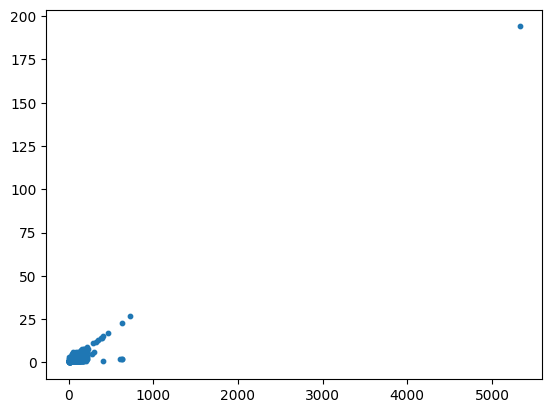

In [18]:
plt.scatter(data_train['full_sq'],data_train['num_room'],s=10)

In [19]:
data_train[data_train['num_room']<1] 

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
702    703  2011-12-26       12      8.0    4.0        NaN       NaN   
1085  1086  2012-02-06       13      9.0    3.0        NaN       NaN   
1188  1189  2012-02-14        9     44.0    3.0        NaN       NaN   
2009  2012  2012-04-25        5     40.0    5.0        NaN       NaN   
2075  2078  2012-05-03       13     13.0    3.0        NaN       NaN   
3908  3911  2012-09-27       10     10.0    5.0        NaN       NaN   
5648  5651  2013-01-15       13     13.0    5.0        NaN       NaN   
5817  5820  2013-01-29       13     13.0    6.0        NaN       NaN   
5957  5960  2013-02-07       13      8.0    5.0        NaN       NaN   
6112  6115  2013-02-22        6      NaN    3.0        NaN       NaN   

      build_year  num_room  kitch_sq  state   product_type  \
702          NaN         0       NaN    NaN     Investment   
1085         NaN         0       NaN    NaN     Investment   
1188         NaN         0       NaN    NaN     Investment   
2009         NaN         0       NaN    NaN     Investment   
2075         NaN         0       NaN    NaN     Investment   
3908         NaN         0       NaN    NaN     Investment   
5648         NaN         0       NaN    NaN     Investment   
5817         NaN         0       NaN    NaN     Investment   
5957         NaN         0       NaN    NaN     Investment   
6112         NaN         0       NaN    NaN  OwnerOccupier   

                     sub_area        area_m  raion_popul  green_zone_part  \
702        Horoshevo-Mnevniki  1.803644e+07       166803         0.232080   
1085       Horoshevo-Mnevniki  1.803644e+07       166803         0.232080   
1188                Veshnjaki  1.051837e+07       118945         0.334905   
2009               Gol'janovo  1.428699e+07       157010         0.389354   
2075     Ochakovo-Matveevskoe  1.752651e+07       118843         0.133373   
3908                 Otradnoe  1.005305e+07       175518         0.096270   
5648     Vostochnoe Izmajlovo  3.799999e+06        76308         0.232656   
5817              Meshhanskoe  4.512002e+06        57999         0.128162   
5957          Juzhnoe Tushino  7.887684e+06       104434         0.222646   
6112  Poselenie Voskresenskoe  2.149409e+07         7122         0.262459   

      indust_part  children_preschool  preschool_quota  \
702      0.111627               10955           3397.0   
1085     0.111627               10955           3397.0   
1188     0.012339                5208           3494.0   
2009     0.194489                7751           5041.0   
2075     0.309479                7454           1830.0   
3908     0.300323                9753           5088.0   
5648     0.149666                5096           1838.0   
5817     0.015017                2420           1525.0   
5957     0.188784                5989           2707.0   
6112     0.017647                 489              NaN   

      preschool_education_centers_raion  children_school  school_quota  \
702                                   4            12238       11085.0   
1085                                  4            12238       11085.0   
1188                                  6             5776        6766.0   
2009                                  6             8004       11081.0   
2075                                  2             7715        6484.0   
3908                                  4            10311       12721.0   
5648                                  2             4789        4474.0   
5817                                  3             3079        5752.0   
5957                                  3             6137        6340.0   
6112                                  0              469           NaN   

      school_education_centers_raion  school_education_centers_top_20_raion  \
702                                5                                      0   
1085                               5                                    

In [20]:
data_train[data_train['num_room']>8] 

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
128      129  2011-10-15      325    325.0    7.0        NaN       NaN   
1307    1310  2012-02-24      291    189.0    2.0        NaN       NaN   
1478    1481  2012-03-11      353     20.0    5.0        NaN       NaN   
1610    1613  2012-03-21      394     17.0   11.0        NaN       NaN   
2425    2428  2012-06-07      412     17.0    6.0        NaN       NaN   
2780    2783  2012-07-06      729     44.0   12.0        NaN       NaN   
3527    3530  2012-09-07     5326     22.0   13.0        NaN       NaN   
3596    3599  2012-09-12      388      NaN    9.0        NaN       NaN   
5944    5947  2013-02-07      634     38.0    3.0        NaN       NaN   
7207    7210  2013-04-10      461     27.0    2.0        NaN       NaN   
28326  28329  2015-03-12      220    144.0    3.0        5.0       2.0   

       build_year  num_room  kitch_sq  state   product_type  \
128           NaN        12       NaN    NaN     Investment   
1307          NaN        11       NaN    NaN     Investment   
1478          NaN        13       NaN    NaN     Investment   
1610          NaN        14       NaN    NaN     Investment   
2425          NaN        15       NaN    NaN     Investment   
2780          NaN        27       NaN    NaN     Investment   
3527          NaN       194       NaN    NaN  OwnerOccupier   
3596          NaN        14       NaN    NaN  OwnerOccupier   
5944          NaN        23       NaN    NaN     Investment   
7207          NaN        17       NaN    NaN     Investment   
28326      1927.0         9      17.0    3.0     Investment   

                   sub_area        area_m  raion_popul  green_zone_part  \
128              Ivanovskoe  1.020722e+07       122862         0.512707   
1307                Kurkino  7.792845e+06        21155         0.528252   
1478               Solncevo  1.132409e+07       113897         0.083810   
1610               Ljublino  1.788191e+07       165727         0.260653   
2425         Filevskij Park  9.629358e+06        89467         0.343754   
2780     Troparevo-Nikulino  1.127507e+07       112804         0.331076   
3527   Birjulevo Vostochnoe  1.479557e+07       145088         0.308057   
3596             Nekrasovka  1.139168e+07        19940         0.055644   
5944              Lianozovo  5.646405e+06        79576         0.258663   
7207       Vyhino-Zhulebino  1.509487e+07       219609         0.300284   
28326           Presnenskoe  1.163805e+07       123280         0.068202   

       indust_part  children_preschool  preschool_quota  \
128       0.000170                6027           2697.0   
1307      0.000000                2539           2794.0   
1478      0.371149                8340           3953.0   
1610      0.133215               10809           5153.0   
2425      0.238617                3903           1522.0   
2780      0.000991                6945           3587.0   
3527      0.050900                9223           4519.0   
3596      0.243205                1706           2395.0   
5944      0.101872                4857           2703.0   
7207      0.033494               10167           7610.0   
28326     0.042032                7125           3240.0   

       preschool_education_centers_raion  children_school  school_quota  \
128                                    7             5992        9439.0   
1307                                   4             2733        6620.0   
1478                                   5             7065        9700.0   
1610                                  10            11395       11887.0   
2425                                   5             3889        4904.0   
2780                                   8             6783       11286.0   
3527                                   6            10621       10053.0   
3596                                   5             1564        7377.0   
5944                                   5             4583        7236.0   
7207

In [21]:
data_train = data_train[data_train['num_room']<9]
print(len(data_train))

30454


In [22]:
data_train['1_sq'] = data_train['price_doc']/data_train['full_sq']

C:\Users\Stas\AppData\Local\Temp\ipykernel_13848\1690966772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['1_sq'] = data_train['price_doc']/data_train['full_sq']


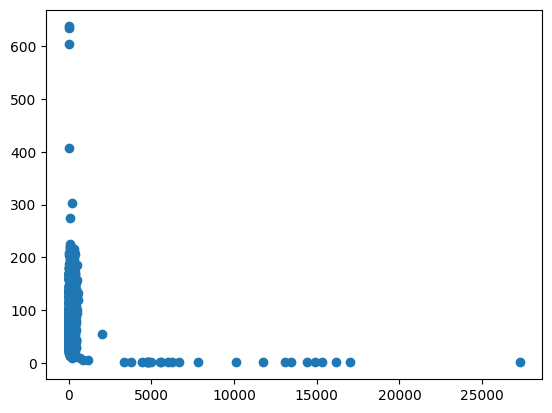

In [23]:
plt.scatter(data_train['1_sq']/1000,data_train['full_sq'])

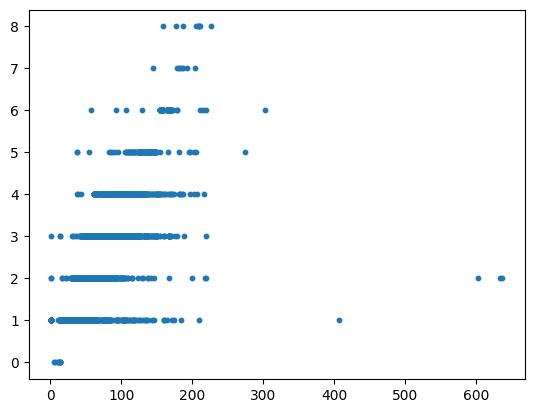

In [24]:
plt.scatter(data_train['full_sq'],data_train['num_room'],s=10)

In [25]:
data_train = data_train[data_train['full_sq']<250]
print(len(data_train))

30448


In [26]:
# посмотрим у кого больше за квадратный метр 500000
data_train[data_train['1_sq']>500000]

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
1188    1189  2012-02-14        9     44.0    3.0        NaN       NaN   
2009    2012  2012-04-25        5     40.0    5.0        NaN       NaN   
2118    2121  2012-05-10       55     31.0   12.0        NaN       NaN   
6112    6115  2013-02-22        6      NaN    3.0        NaN       NaN   
11085  11088  2013-10-08      132     76.0   16.0       28.0       4.0   
11332  11335  2013-10-18        1     40.0   10.0       17.0       1.0   
16099  16102  2014-03-17      120     63.0   15.0       20.0       4.0   
16289  16292  2014-03-20        1      1.0    1.0        1.0       4.0   
16738  16741  2014-03-31        1      1.0    1.0        1.0       4.0   
17194  17197  2014-04-09        1      1.0    1.0        1.0       1.0   
18600  18603  2014-05-19        1      1.0    1.0        1.0       1.0   
22171  22174  2014-09-03        1      1.0    1.0        1.0       1.0   
22412  22415  2014-09-11        1     47.0   11.0       17.0       1.0   
22722  22725  2014-09-20        1      1.0    1.0       25.0       1.0   
22795  22798  2014-09-23        1      1.0    7.0       19.0       1.0   
22871  22874  2014-09-24        1      1.0    1.0        1.0       1.0   
23048  23051  2014-09-29        1      1.0    1.0        1.0       1.0   
23228  23231  2014-10-03        1      1.0    1.0        1.0       1.0   
23573  23576  2014-10-15        1      1.0    1.0        1.0       1.0   
23726  23729  2014-10-20        1      1.0    1.0        1.0       1.0   
24627  24630  2014-11-12        1      1.0    1.0        1.0       1.0   
24856  24859  2014-11-18      101      NaN   15.0        0.0       4.0   
24892  24895  2014-11-18        1      1.0   26.0        1.0       1.0   
25569  25572  2014-12-01        1      1.0    1.0       17.0       1.0   
25887  25890  2014-12-05        1      1.0   19.0        4.0       1.0   
26264  26267  2014-12-11        1     60.0   17.0       17.0       1.0   
26363  26366  2014-12-12        1     64.0   22.0       22.0       1.0   
26386  26389  2014-12-13        1      1.0    1.0        1.0       1.0   
26582  26585  2014-12-16        1      1.0    1.0        1.0       1.0   
26925  26928  2014-12-20        1      1.0   17.0        1.0       1.0   
27154  27157  2014-12-26        1      1.0    1.0        1.0       1.0   

       build_year  num_room  kitch_sq  state   product_type  \
1188          NaN         0       NaN    NaN     Investment   
2009          NaN         0       NaN    NaN     Investment   
2118          NaN         2       NaN    NaN     Investment   
6112          NaN         0       NaN    NaN  OwnerOccupier   
11085      2006.0         4      12.0    NaN     Investment   
11332      2013.0         1       1.0    1.0  OwnerOccupier   
16099      2002.0         3      17.0    4.0     Investment   
16289         1.0         1       1.0    3.0  OwnerOccupier   
16738         1.0         1       1.0    3.0  OwnerOccupier   
17194         1.0         1       1.0    1.0  OwnerOccupier   
18600         1.0         1       1.0    3.0  OwnerOccupier   
22171         1.0         1       1.0    1.0  OwnerOccupier   
22412      2014.0         1       1.0    1.0  OwnerOccupier   
22722      2014.0         1       1.0    1.0  OwnerOccupier   
22795      2015.0         3       1.0    1.0  OwnerOccupier   
22871      2015.0         1       1.0    1.0  OwnerOccupier   
23048         NaN         1       1.0    1.0  OwnerOccupier   
23228         1.0         1       1.0    1.0  OwnerOccupier   
23573         1.0         1       1.0    1.0  OwnerOccupier   
23726         1.0         1       1.0    1.0  OwnerOccupier   
24627         1.0         1       1.0    1.0  OwnerOccupier   
24856         NaN         2       0.0    NaN  OwnerOccupier   
24892         1.0         1       1.0    1.0  OwnerOccupier   
25569         1.0         1       1.0    1.0  OwnerOccupier   
25887         1.0         1       1.0    1.0  OwnerOccupier   
262

удалим эти строчки для построения модели

In [27]:
data_train = data_train[data_train['1_sq']<500000]
print(len(data_train))

30417


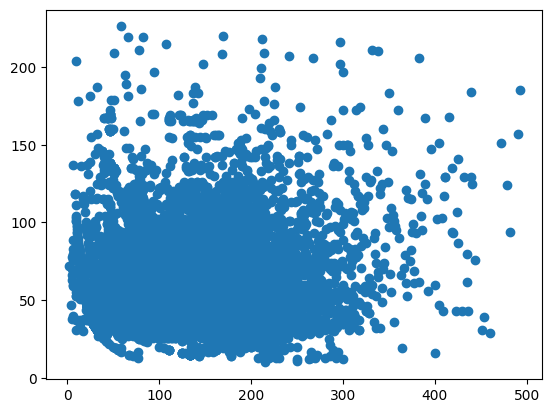

In [28]:
plt.scatter(data_train['1_sq']/1000,data_train['full_sq'])

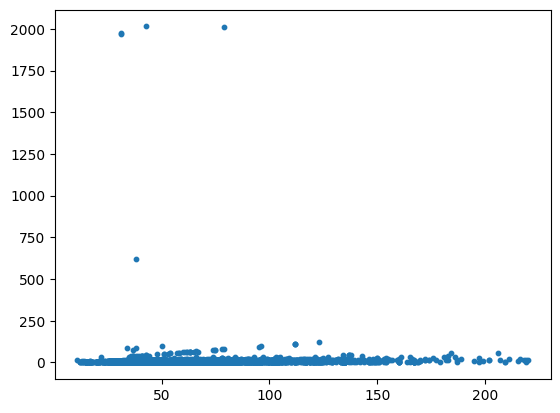

In [29]:
# проверим на выбросы площади кухни
plt.scatter(data_train['full_sq'],data_train['kitch_sq'],s=10)

In [30]:
data_train[data_train['kitch_sq']>=100]

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
8949    8952  2013-07-04      123    123.0    3.0       10.0       2.0   
10368  10371  2013-09-10       79     41.0    5.0       17.0       6.0   
11520  11523  2013-10-24       38     23.0   11.0       14.0       5.0   
13117  13120  2013-12-14       31     19.0    5.0        1.0       1.0   
20053  20056  2014-06-24      112    112.0    3.0        3.0       1.0   
21415  21418  2014-08-11       43     43.0    3.0        1.0       1.0   
27931  27934  2015-02-16      112    112.0    3.0        3.0       1.0   
27996  27999  2015-02-19      112    112.0    3.0        3.0       1.0   
28734  28737  2015-03-31       31     16.0    2.0       12.0       5.0   

       build_year  num_room  kitch_sq  state   product_type  \
8949       2013.0         3     123.0    3.0  OwnerOccupier   
10368      2013.0         3    2013.0    1.0  OwnerOccupier   
11520      1971.0         2     620.0    2.0     Investment   
13117         NaN         1    1970.0    3.0     Investment   
20053      2015.0         3     112.0    3.0  OwnerOccupier   
21415      2014.0         1    2014.0    1.0  OwnerOccupier   
27931      2015.0         3     112.0    3.0  OwnerOccupier   
27996      2015.0         3     112.0    3.0  OwnerOccupier   
28734      1972.0         1    1974.0    3.0     Investment   

                      sub_area        area_m  raion_popul  green_zone_part  \
8949   Poselenie Voskresenskoe  2.149409e+07         7122         0.262459   
10368  Poselenie Voskresenskoe  2.149409e+07         7122         0.262459   
11520              Novogireevo  4.395333e+06        94561         0.063755   
13117                Izmajlovo  1.504557e+07       102828         0.637399   
20053      Poselenie Sosenskoe  6.677245e+07         9553         0.336177   
21415      Poselenie Sosenskoe  6.677245e+07         9553         0.336177   
27931      Poselenie Sosenskoe  6.677245e+07         9553         0.336177   
27996        Zapadnoe Degunino  7.632940e+06        78810         0.051844   
28734               Matushkino  4.708040e+06        38075         0.271702   

       indust_part  children_preschool  preschool_quota  \
8949      0.017647                 489              NaN   
10368     0.017647                 489              NaN   
11520     0.038693                6120           2215.0   
13117     0.006076                4992           1313.0   
20053     0.072158                 656              NaN   
21415     0.072158                 656              NaN   
27931     0.072158                 656              NaN   
27996     0.437885                5519           1503.0   
28734     0.310199                2448           2080.0   

       preschool_education_centers_raion  children_school  school_quota  \
8949                                   0              469           NaN   
10368                                  0              469           NaN   
11520                                  4             6533        5824.0   
13117                                  4             5285        4339.0   
20053                                  0              629           NaN   
21415                                  0              629           NaN   
27931                                  0              629           NaN   
27996                                  3             5735        5782.0   
28734                                  3             2748        3885.0   

       school_education_centers_raion  school_education_centers_top_20_raion  \
8949                                0                                      0   
10368                               0                                      0   
11520                               4                                      0   
13117                               6                                      0   
20053                               0                                      0   
21415                              

прежде чем удалять данные строчки надо заполнить пропущенные значения в площади кухни и нулевые значения

In [31]:
print(data_train['kitch_sq'].isnull().sum())


9558


In [32]:
data_train['kitch_sq'] = data_train['kitch_sq'].fillna(0)
print(data_train['kitch_sq'].isnull().sum())

0


In [33]:
# посчитаем средний процент от общей площади, чтобы в дальнейшем заполнить пропущенные значения в кухне
data_train_k = data_train[data_train['kitch_sq']>0]
d = data_train_k['kitch_sq']/data_train_k['full_sq']
k_d = d.mean()
k_d

0.1395084020983012

In [34]:
data_train['kitch_sq'] = data_train['kitch_sq'].replace(0, np.nan)


In [35]:
data_train['kitch_sq'] = round(data_train['kitch_sq'].fillna(data_train['full_sq'] * k_d))

In [36]:
data_train[data_train['kitch_sq']>=data_train['full_sq']]

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
8056    8059  2013-05-21       11     11.0    2.0        5.0       2.0   
8949    8952  2013-07-04      123    123.0    3.0       10.0       2.0   
9172    9175  2013-07-12       37     19.0    9.0       10.0       1.0   
10187  10190  2013-08-30       54     54.0   25.0       25.0       6.0   
10368  10371  2013-09-10       79     41.0    5.0       17.0       6.0   
10641  10644  2013-09-21       41      1.0    2.0        1.0       6.0   
10680  10683  2013-09-24       41     41.0   10.0       19.0       4.0   
10728  10731  2013-09-25       63     30.0   16.0       16.0       4.0   
11187  11190  2013-10-11       58      1.0   13.0       22.0       6.0   
11246  11249  2013-10-15       48     42.0   20.0        1.0       1.0   
11520  11523  2013-10-24       38     23.0   11.0       14.0       5.0   
11862  11865  2013-11-06       54      1.0   22.0       22.0       6.0   
12245  12248  2013-11-18       22     14.0    3.0        5.0       2.0   
12423  12426  2013-11-23       75     46.0    7.0       12.0       1.0   
13117  13120  2013-12-14       31     19.0    5.0        1.0       1.0   
15588  15591  2014-03-01       35     19.0    4.0       14.0       1.0   
15970  15973  2014-03-13       62     33.0    1.0        7.0       1.0   
16412  16415  2014-03-24       74     51.0    1.0        9.0       1.0   
16888  16891  2014-04-02       53     32.0    7.0       17.0       1.0   
17901  17904  2014-04-26       78     78.0   10.0       15.0       1.0   
20053  20056  2014-06-24      112    112.0    3.0        3.0       1.0   
20258  20261  2014-06-27       37     37.0    7.0       15.0       1.0   
20422  20425  2014-06-30       51     51.0   10.0       17.0       1.0   
20471  20474  2014-06-30       61      NaN   11.0       17.0       4.0   
21058  21061  2014-07-23       22     22.0    7.0        9.0       1.0   
21415  21418  2014-08-11       43     43.0    3.0        1.0       1.0   
21529  21532  2014-08-14       51     51.0    2.0       17.0       1.0   
22191  22194  2014-09-03       60     33.0    4.0       17.0       4.0   
22260  22263  2014-09-05       37     37.0   10.0       19.0       1.0   
22458  22461  2014-09-12       66     62.0    2.0        2.0       1.0   
23216  23219  2014-10-02       43     29.0    5.0        5.0       2.0   
23219  23222  2014-10-02       37     37.0   17.0       19.0       1.0   
23692  23695  2014-10-18       36     36.0   19.0       19.0       1.0   
23789  23792  2014-10-21       63     31.0    5.0       17.0       1.0   
24057  24060  2014-10-28       63     63.0   12.0       17.0       1.0   
26236  26239  2014-12-11       34     16.0    2.0       17.0       2.0   
26255  26258  2014-12-11       40     40.0   11.0       11.0       1.0   
26498  26501  2014-12-16       57     57.0   12.0       12.0       1.0   
26780  26783  2014-12-18       39     20.0    1.0       10.0       1.0   
26813  26816  2014-12-18       95     95.0   14.0       14.0       1.0   
26850  26853  2014-12-19       38     20.0    4.0       12.0       1.0   
27395  27398  2015-01-21       62      NaN   13.0       17.0       1.0   
27650  27653  2015-01-31       43     43.0    2.0       17.0       1.0   
27931  27934  2015-02-16      112    112.0    3.0        3.0       1.0   
27996  27999  2015-02-19      112    112.0    3.0        3.0       1.0   
28314  28317  2015-03-11       58     58.0    7.0       17.0       1.0   
28434  28437  2015-03-18       96     96.0   22.0       25.0       1.0   
28709  28712  2015-03-30       41     41.0   11.0       17.0       1.0   
28712  28715  2015-03-30       41     41.0   11.0       17.0       1.0   
28734  28737  2015-03-31       31     16.0    2.0       12.0       5.0   
28997  29000  2015-04-09       50     30.0    4.0       17.0       1.0   
30443  30446  2015-06-27       79      NaN   17.0       17.0       1.0   

       build_year  num_room  kitch_sq  state   product_type  \
8056       1907.0       

здесь видно, что общая площадь не может быть меньше или равно площадь кухни

In [37]:
data_train = data_train[data_train['kitch_sq']<data_train['full_sq']]
len(data_train)

30365

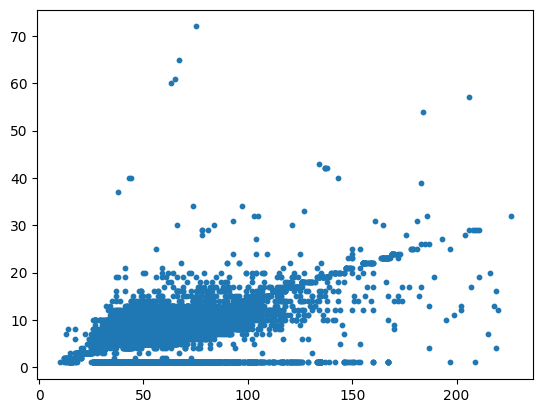

In [38]:
plt.scatter(data_train['full_sq'],data_train['kitch_sq'],s=10)

In [39]:
data_train[(data_train['kitch_sq']>50) & (data_train['full_sq']<150)]

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
15930  15933  2014-03-12       63     60.0   14.0       20.0       1.0   
18404  18407  2014-05-14       67     47.0    5.0        6.0       2.0   
22137  22140  2014-09-02       75     43.0   11.0       16.0       1.0   
29588  29591  2015-05-07       65     46.0    5.0        9.0       1.0   

       build_year  num_room  kitch_sq  state   product_type  \
15930      2015.0         2      60.0    1.0  OwnerOccupier   
18404      1929.0         3      65.0    2.0     Investment   
22137      1986.0         3      72.0    3.0     Investment   
29588      1978.0         4      61.0    2.0     Investment   

                      sub_area       area_m  raion_popul  green_zone_part  \
15930  Poselenie Voskresenskoe  21494094.80         7122         0.262459   
18404              Presnenskoe  11638050.15       123280         0.068202   
22137               Mozhajskoe  16861532.79       132349         0.069671   
29588                 Jasenevo  24813850.39       174831         0.683844   

       indust_part  children_preschool  preschool_quota  \
15930     0.017647                 489              NaN   
18404     0.042032                7125           3240.0   
22137     0.130618                9005           4182.0   
29588     0.037178               10712           4172.0   

       preschool_education_centers_raion  children_school  school_quota  \
15930                                  0              469           NaN   
18404                                  7             6856       10602.0   
22137                                  6            10418        8658.0   
29588                                  7            11217       10559.0   

       school_education_centers_raion  school_education_centers_top_20_raion  \
15930                               0                                      0   
18404                               9                                      0   
22137                               6                                      0   
29588                               7                                      0   

       hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
15930                  NaN                         0                        0   
18404               1940.0                         2                        1   
22137                900.0                         1                        0   
29588               2300.0                         1                        0   

       sport_objects_raion  additional_education_raion culture_objects_top_25  \
15930                    0                           2                     no   
18404                   29                           2                    yes   
22137                   12                           2                     no   
29588                    7                           7                     no   

       culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
15930                             0                       0             0   
18404                             3                       5            84   
22137                             0                       9             9   
29588                             0                       7             1   

      thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
15930                        no                 no                  no   
18404                        no                 no                  no   
22137                        no                 no                  no   
29588                        no                 no                  no   

      radiation_raion railroad_terminal_raion big_market_raion  \
15930              no                      no               no   
18404             yes                      no               no   
22137             yes                      no               no   
29588             yes          

In [40]:
# убираем эти строчки
data_train = data_train[(data_train['kitch_sq']<50)]
len(data_train)

30359

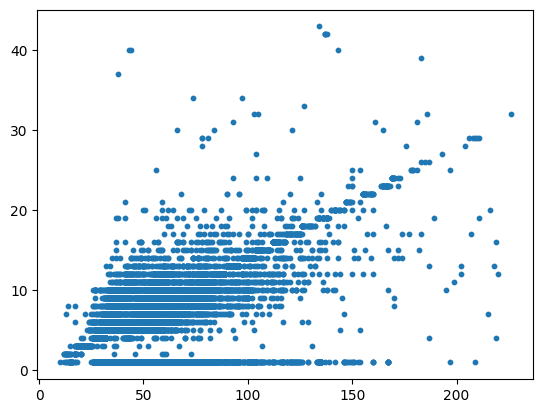

In [41]:
plt.scatter(data_train['full_sq'],data_train['kitch_sq'],s=10)

In [42]:
# выбор столбцов текстовых
data_obj = data_train.select_dtypes('object')

In [43]:
# проверим объекты на пропуски
data_obj.info()
print('\nВсего строк: ', len(data_obj))

<class 'pandas.core.frame.DataFrame'>
Index: 30359 entries, 0 to 30470
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  30359 non-null  object
 1   product_type               30359 non-null  object
 2   sub_area                   30359 non-null  object
 3   culture_objects_top_25     30359 non-null  object
 4   thermal_power_plant_raion  30359 non-null  object
 5   incineration_raion         30359 non-null  object
 6   oil_chemistry_raion        30359 non-null  object
 7   radiation_raion            30359 non-null  object
 8   railroad_terminal_raion    30359 non-null  object
 9   big_market_raion           30359 non-null  object
 10  nuclear_reactor_raion      30359 non-null  object
 11  detention_facility_raion   30359 non-null  object
 12  water_1line                30359 non-null  object
 13  big_road1_1line            30359 non-null  object
 14  railroad_1l

In [44]:
data_train['product_type'].unique()

array(['Investment', 'OwnerOccupier'], dtype=object)

в столбце "product_type" перечисляются типы продаж:

для инвестиций  -  Investment

для частного использования  -  OwnerOccupier

преобразуем значения:

Investment  -  1

OwnerOccupier  -  2

In [45]:
data_train['product_type'] = data_train['product_type'].replace(['Investment','OwnerOccupier'],[1,2])
data_train['product_type'].unique()

array([1, 2], dtype=int64)

In [46]:
# рассмотрим столбец sub_area, это столбец с микрорайонами
d = data_train['sub_area'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением района
d_sa['sub_area_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

sub_area  sub_area_num
0      Poselenie Sosenskoe             1
1               Nekrasovka             2
2     Poselenie Vnukovskoe             3
3     Poselenie Moskovskij             4
4  Poselenie Voskresenskoe             5

In [47]:
# добавляем столбец с числовым значением
data_train = pd.merge(data_train,d_sa,on='sub_area')

In [48]:
# рассмотрим столбец thermal_power_plant_raion, это столбец - Наличие тепловой электростанции в округе
d = data_train['thermal_power_plant_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['thermal_power_plant_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

thermal_power_plant_raion  thermal_power_plant_raion_num
0                        no                              1
1                       yes                              2

In [49]:
data_train = pd.merge(data_train,d_sa,on='thermal_power_plant_raion')

In [50]:
# рассмотрим столбец - incineration_raion	Наличие мусоросжигательных заводов
d = data_train['incineration_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['incineration_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

incineration_raion  incineration_raion_num
0                 no                       1
1                yes                       2

In [51]:
data_train = pd.merge(data_train,d_sa,on='incineration_raion')

In [52]:
# рассмотрим столбец - oil_chemistry_raion Наличие грязных производств
d = data_train['oil_chemistry_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['oil_chemistry_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

oil_chemistry_raion  oil_chemistry_raion_num
0                  no                        1
1                 yes                        2

In [53]:
data_train = pd.merge(data_train,d_sa,on='oil_chemistry_raion')

In [54]:
# рассмотрим столбец - radiation_raion	Наличие мест захоронения радиоактивных отходов
d = data_train['radiation_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['radiation_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

radiation_raion  radiation_raion_num
0              no                    1
1             yes                    2

In [55]:
data_train = pd.merge(data_train,d_sa,on='radiation_raion')

In [56]:
# рассмотрим столбец - railroad_terminal_raion	Наличие железнодорожного терминала в районе
d = data_train['railroad_terminal_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['railroad_terminal_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

railroad_terminal_raion  railroad_terminal_raion_num
0                      no                            1
1                     yes                            2

In [57]:
data_train = pd.merge(data_train,d_sa,on='railroad_terminal_raion')

In [58]:
# рассмотрим столбец - big_market_raion	Наличие крупных продуктовых / оптовых рынков
d = data_train['big_market_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['big_market_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

big_market_raion  big_market_raion_num
0               no                     1
1              yes                     2

In [59]:
data_train = pd.merge(data_train,d_sa,on='big_market_raion')

In [60]:
# рассмотрим столбец - nuclear_reactor_raion	Наличие действующих ядерных реакторов
d = data_train['nuclear_reactor_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['nuclear_reactor_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

nuclear_reactor_raion  nuclear_reactor_raion_num
0                    no                          1
1                   yes                          2

In [61]:
data_train = pd.merge(data_train,d_sa,on='nuclear_reactor_raion')

In [62]:
# рассмотрим столбец - detention_facility_raion	Наличие центров содержания под стражей
d = data_train['detention_facility_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['detention_facility_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

detention_facility_raion  detention_facility_raion_num
0                       no                             1
1                      yes                             2

In [63]:
data_train = pd.merge(data_train,d_sa,on='detention_facility_raion')

In [64]:
# рассмотрим столбец - water_1line	Первая линия от реки (150 м)
d = data_train['water_1line'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['water_1line_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

water_1line  water_1line_num
0          no                1
1         yes                2

In [65]:
data_train = pd.merge(data_train,d_sa,on='water_1line')

In [66]:
# рассмотрим столбец - big_road1_1line	Первая линия от дороги (100 м для скоростных автомагистралей)
d = data_train['big_road1_1line'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['big_road1_1line_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

big_road1_1line  big_road1_1line_num
0              no                    1
1             yes                    2

In [67]:
data_train = pd.merge(data_train,d_sa,on='big_road1_1line')

In [68]:
# рассмотрим столбец - railroad_1line	Первая линия от железной дороги (100 м)
d = data_train['railroad_1line'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['railroad_1line_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

railroad_1line  railroad_1line_num
0             no                   1
1            yes                   2

In [69]:
data_train = pd.merge(data_train,d_sa,on='railroad_1line')

In [70]:
# рассмотрим столбец - ecology	Экологическая зона, в которой расположен дом
d = data_train['ecology'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['ecology_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

ecology  ecology_num
0          poor            1
1       no data            2
2          good            3
3     excellent            4
4  satisfactory            5

In [71]:
data_train = pd.merge(data_train,d_sa,on='ecology')

In [72]:
numerical_cols = data_train.select_dtypes(include=['int64', 'float64']).columns.to_list()
print("Числовые колонки:", numerical_cols)

categorical_cols = data_train.select_dtypes(include=['object', 'category']).columns.to_list()
print("Категориальные колонки:", categorical_cols)

Числовые колонки: ['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'kitch_sq', 'state', 'product_type', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_blo

In [73]:
np.object = object
data_train.loc[:,data_train.dtypes==np.object].columns.to_list()

['timestamp',
 'sub_area',
 'culture_objects_top_25',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'water_1line',
 'big_road1_1line',
 'railroad_1line',
 'ecology']

In [74]:
# удаление текстовых столбцов, их значения в новых столбцах с числовыми значениями

data_train = data_train.drop(['timestamp',
                      'sub_area',
                      'culture_objects_top_25',
                      'thermal_power_plant_raion',
                      'incineration_raion',
                      'oil_chemistry_raion',
                      'radiation_raion',
                      'railroad_terminal_raion',
                      'big_market_raion',
                      'nuclear_reactor_raion',
                      'detention_facility_raion',
                      'water_1line',
                      'big_road1_1line',
                      'railroad_1line',
                      'ecology'], axis=1)     


In [75]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30359 entries, 0 to 30358
Columns: 291 entries, id to ecology_num
dtypes: float64(119), int32(14), int64(158)
memory usage: 65.8 MB


In [76]:
np.object = object
data_train.loc[:,data_train.dtypes==np.object].columns.to_list()

[]

In [77]:
# подготовка к обучению

# загрузка правильных ответов
data_y = pd.DataFrame()
data_y['price_doc'] = data_train['price_doc']/1000
data_y.describe()

price_doc
count  30359.000000
mean    7104.916589
std     4649.241398
min      100.000000
25%     4740.002000
50%     6273.960000
75%     8300.000000
max    91066.096000

In [78]:
# формирование тренировочных данных
data_X = data_train

<Axes: >

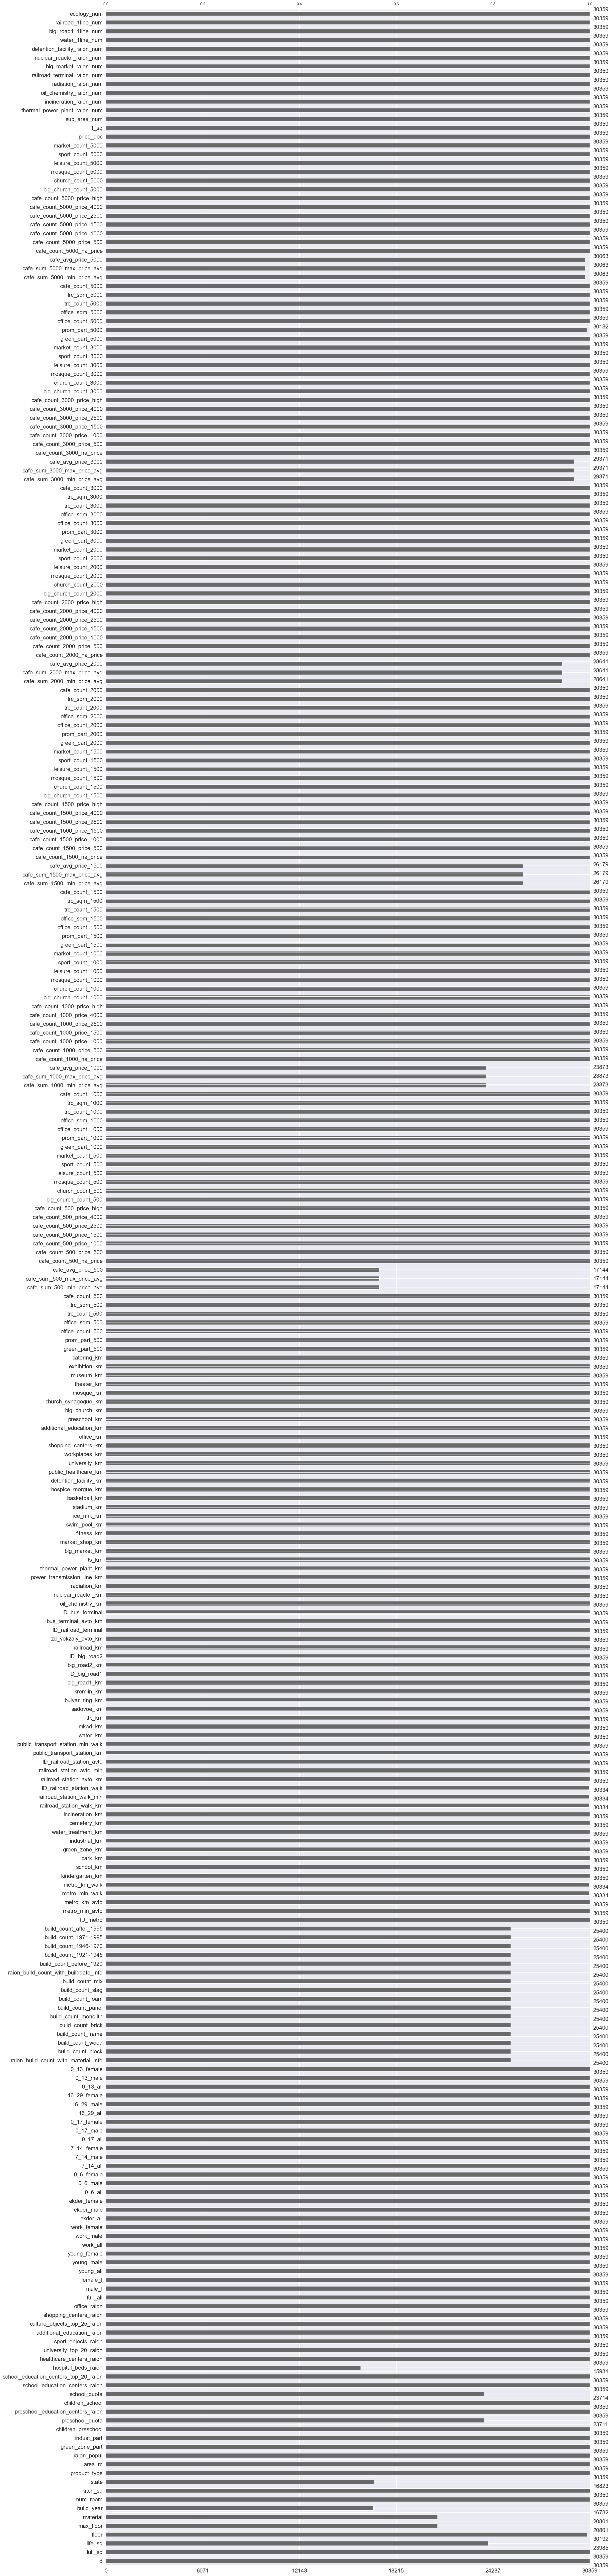

In [79]:
# для визуальной оценки пропусков
import missingno as msno
import seaborn as sns

sns.set()

msno.bar(data_X)

In [80]:
# подсчет сколько пропущенных значений в столбцах
d_null = data_X.isnull().sum()[data_X.isnull().sum()>0]
d_null = d_null.to_frame(name='col').reset_index().sort_values('col',ascending=True)
print('Количество столбцов с пустыми значениями: ', len(d_null))
print('Количество пропущенных значений в по столбцам:\n',d_null)

Количество столбцов с пустыми значениями:  49
Количество пропущенных значений в по столбцам:
                                     index    col
25                         metro_min_walk     25
26                          metro_km_walk     25
29               ID_railroad_station_walk     25
28              railroad_station_walk_min     25
27               railroad_station_walk_km     25
1                                   floor    167
45                         prom_part_5000    177
48                    cafe_avg_price_5000    296
46            cafe_sum_5000_min_price_avg    296
47            cafe_sum_5000_max_price_avg    296
44                    cafe_avg_price_3000    988
43            cafe_sum_3000_max_price_avg    988
42            cafe_sum_3000_min_price_avg    988
41                    cafe_avg_price_2000   1718
40            cafe_sum_2000_max_price_avg   1718
39            cafe_sum_2000_min_price_avg   1718
38                    cafe_avg_price_1500   4180
37            cafe_sum_1

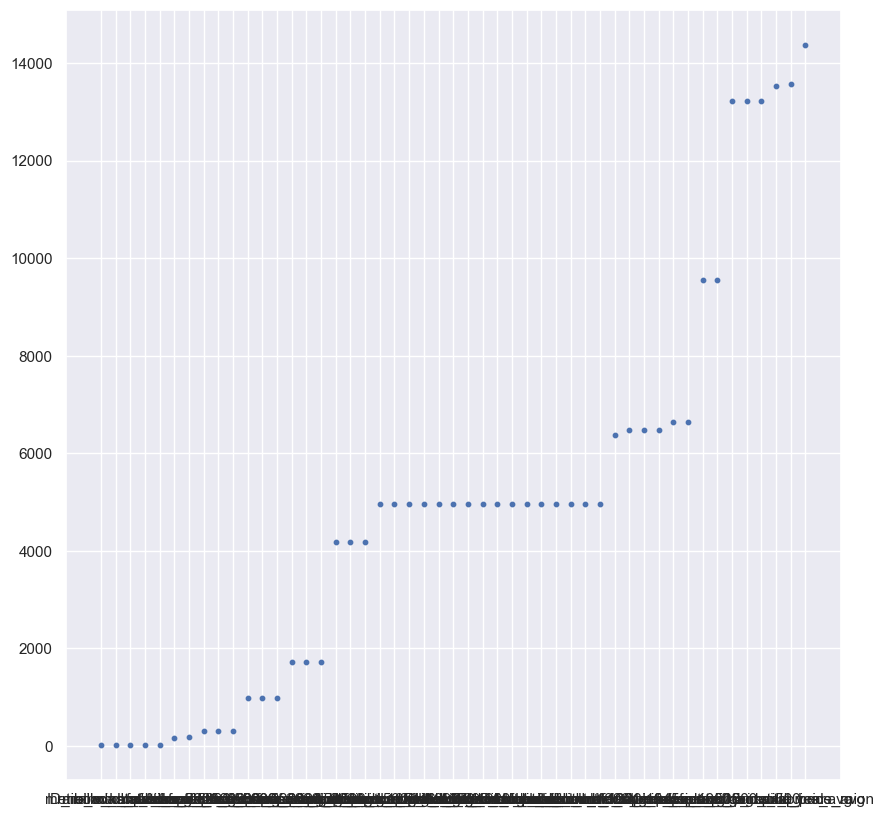

In [81]:
plt.figure(figsize=(10, 10))
plt.scatter(d_null['index'],d_null['col'],s=10)
plt.show()

In [82]:
# посмотрим какие столбцы с пустыми значениями более 10000
d_ncol = d_null[d_null['col']>10000]
d_ncol

index    col
32          cafe_avg_price_500  13215
31  cafe_sum_500_max_price_avg  13215
30  cafe_sum_500_min_price_avg  13215
5                        state  13536
4                   build_year  13577
8          hospital_beds_raion  14378

In [83]:
# в столбце build_year пропущено значений почти половино, будет целесообразно удалить его для обучения
# удаляем столбцы с пустыми значениями больше 10000
for i in d_ncol['index']:
     data_X = data_X.drop(i,axis=1)

In [84]:
data_X.isnull().sum()[data_X.isnull().sum()>0]

life_sq                                  6374
floor                                     167
max_floor                                9558
material                                 9558
preschool_quota                          6648
school_quota                             6645
raion_build_count_with_material_info     4959
build_count_block                        4959
build_count_wood                         4959
build_count_frame                        4959
build_count_brick                        4959
build_count_monolith                     4959
build_count_panel                        4959
build_count_foam                         4959
build_count_slag                         4959
build_count_mix                          4959
raion_build_count_with_builddate_info    4959
build_count_before_1920                  4959
build_count_1921-1945                    4959
build_count_1946-1970                    4959
build_count_1971-1995                    4959
build_count_after_1995            

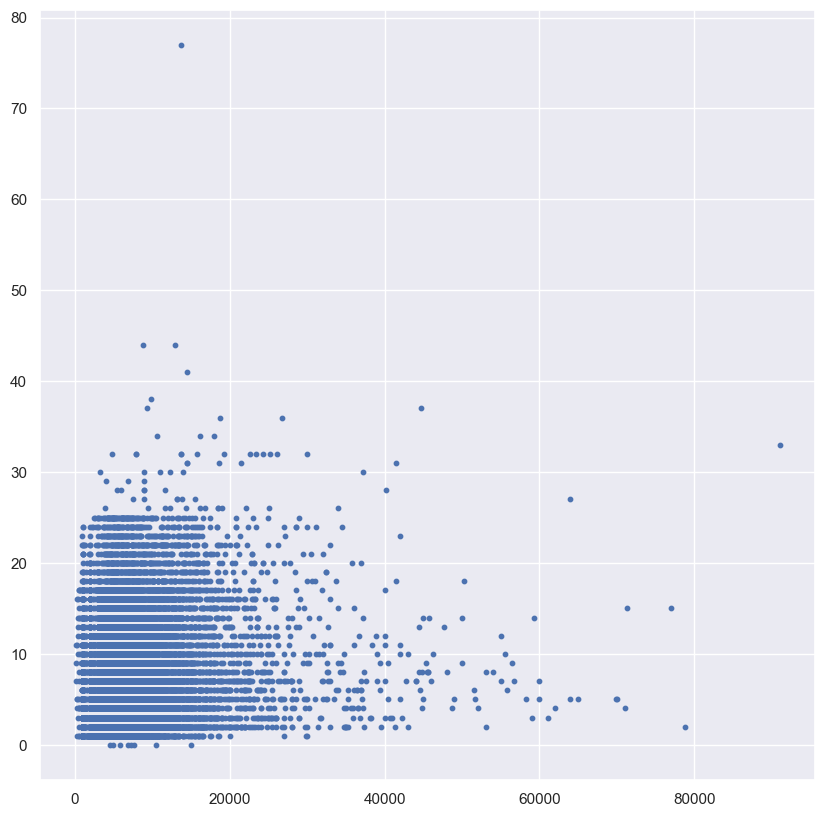

In [85]:
plt.figure(figsize=(10, 10))
plt.scatter(data_X['price_doc']/1000,data_X['floor'],s=10)
plt.show()

In [86]:
# заменим пустые значения на среднее
data_X = data_X.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)

In [87]:
data_X.isnull().sum()[data_X.isnull().sum()>0]

Series([], dtype: int64)

In [88]:
# подсчет сколько нулевых значений в столбцах
d_nnull = data_X[data_X == 0].count()[data_X[data_X == 0].count()>0]
d_nnull = d_nnull.to_frame(name='col').reset_index().sort_values('col',ascending=True)
print('Количество столбцов с пустыми значениями: ', len(d_nnull))
print('Количество пропущенных значений в по столбцам:\n',d_nnull)

Количество столбцов с пустыми значениями:  165
Количество пропущенных значений в по столбцам:
                           index    col
33                metro_km_walk      1
31                metro_km_avto      1
30               metro_min_avto      1
40                 swim_pool_km      1
41                  ice_rink_km      1
..                          ...    ...
82   cafe_count_1000_price_high  28999
105           mosque_count_1500  29210
62    cafe_count_500_price_high  29526
85            mosque_count_1000  29777
65             mosque_count_500  30211

[165 rows x 2 columns]


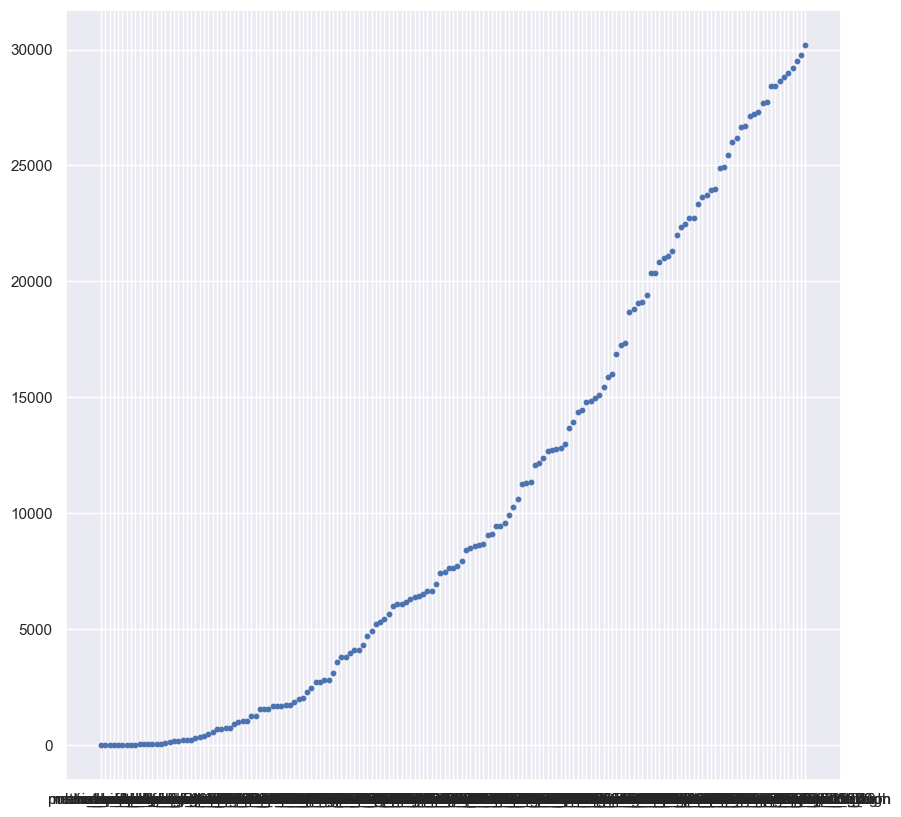

In [89]:
plt.figure(figsize=(10, 10))
plt.scatter(d_nnull['index'],d_nnull['col'],s=10)
plt.show()

In [90]:
# посмотрим какие столбцы с нулевыми значениями более 10000
d_col = d_nnull[d_nnull['col']>10000]

In [91]:
d_col

index    col
162          leisure_count_5000  10243
122       big_church_count_2000  10608
91            office_count_1500  11251
92              office_sqm_1500  11289
84            church_count_1000  11345
..                          ...    ...
82   cafe_count_1000_price_high  28999
105           mosque_count_1500  29210
62    cafe_count_500_price_high  29526
85            mosque_count_1000  29777
65             mosque_count_500  30211

[69 rows x 2 columns]

In [92]:
# удаляем столбцы с нулями больше половины строчек
for i in d_col['index']:
     data_X = data_X.drop(i,axis=1)

In [93]:
# смотрим в каком столбце значение в степени
data_X.describe()

id       full_sq       life_sq         floor     max_floor  \
count  30359.000000  30359.000000  30359.000000  30359.000000  30359.000000   
mean   15225.042459     53.867519     34.328705      7.669118     12.560165   
std     8795.877907     20.963415     46.306603      5.298708      5.581476   
min        1.000000     10.000000      0.000000      0.000000      0.000000   
25%     7606.500000     38.000000     22.000000      3.000000      9.000000   
50%    15214.000000     49.000000     34.328705      7.000000     12.560165   
75%    22838.500000     63.000000     38.000000     11.000000     16.000000   
max    30473.000000    226.000000   7478.000000     77.000000    117.000000   

           material      num_room      kitch_sq  product_type        area_m  \
count  30359.000000  30359.000000  30359.000000  30359.000000  3.035900e+04   
mean       1.826979      1.900557      6.692941      1.360750  1.764014e+07   
std        1.225757      0.854428      3.659091      0.480226  2.063697e+07   
min        1.000000      0.000000      1.000000      1.000000  2.081628e+06   
25%        1.000000      1.000000      5.000000      1.000000  7.307411e+06   
50%        1.826979      2.000000      7.000000      1.000000  1.050803e+07   
75%        1.826979      2.000000      9.000000      2.000000  1.803644e+07   
max        6.000000      8.000000     43.000000      2.000000  2.060718e+08   

         raion_popul  green_zone_part   indust_part  children_preschool  \
count   30359.000000     30359.000000  30359.000000        30359.000000   
mean    84109.305610         0.218854      0.118924         5142.771666   
std     57858.572046         0.175084      0.118741         3816.098316   
min      2546.000000         0.001879      0.000000          175.000000   
25%     21819.000000         0.063755      0.019509         1706.000000   
50%     83502.000000         0.167526      0.072158         4857.000000   
75%    122862.000000         0.336177      0.195781         7103.000000   
max    247469.000000         0.852923      0.521867        19223.000000   

       preschool_quota  preschool_education_centers_raion  children_school  \
count     30359.000000                       30359.000000     30359.000000   
mean       3271.406984                           4.066932      5357.218222   
std        1917.623902                           2.992810      3989.040172   
min           0.000000                           0.000000       168.000000   
25%        2232.000000                           2.000000      1564.000000   
50%        3271.406984                           4.000000      5261.000000   
75%        3587.000000                           6.000000      7227.000000   
max       11926.000000                          13.000000     19083.000000   

       school_quota  school_education_centers_raion  sport_objects_raion  \
count  30359.000000                    30359.000000         30359.000000   
mean    8323.765877                        4.706841             6.636516   
std     3791.500040                        3.443773             6.567337   
min     1012.000000                        0.000000             0.000000   
25%     6237.000000                        2.000000             1.000000   
50%     8323.765877                        5.000000             5.000000   
75%     9373.000000                        7.000000            10.000000   
max    24750.000000                       14.000000            29.000000   

       additional_education_raion  shopping_centers_raion  office_raion  \
count                30359.000000            30359.000000  30359.000000   
mean                     2.897329                4.203465      8.251128   
std                      3.291406                4.742809     23.530220   
min                      0.000000                0.000000      0.000000   
25%                      1.000000                1.000000      0.000000   
50%                      2.000000                3.000000      2.000000   
75% 

In [94]:
data_X_copy = data_X

In [95]:
data_X['kitch_sq'].astype(int).unique()


array([ 6,  4,  9,  7,  8,  5, 10, 12, 11, 13, 19, 15, 16,  1, 14, 40, 17,
       39,  3, 20, 18, 21, 29,  2, 22, 30, 23, 28, 25, 26, 27, 24, 34, 32,
       37, 31, 42, 33, 43])

In [96]:
# разделяем на обучающую выборку и тестовую
# предварительно убрать правильные ответы
data_X = data_X.drop('price_doc', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, shuffle=False, random_state=42)

In [97]:
data_X.head()

id  full_sq  life_sq  floor  max_floor  material  num_room  kitch_sq  \
0    1       43     27.0    4.0  12.560165  1.826979         2       6.0   
1    8       44     44.0    5.0  12.560165  1.826979         2       6.0   
2   71       32     19.0    9.0  12.560165  1.826979         1       4.0   
3  103       44     28.0    4.0  12.560165  1.826979         2       6.0   
4  367       63     45.0    2.0  12.560165  1.826979         2       9.0   

   product_type     area_m  raion_popul  green_zone_part  indust_part  \
0             1  6407578.1       155572         0.189727      0.00007   
1             1  6407578.1       155572         0.189727      0.00007   
2             1  6407578.1       155572         0.189727      0.00007   
3             1  6407578.1       155572         0.189727      0.00007   
4             1  6407578.1       155572         0.189727      0.00007   

   children_preschool  preschool_quota  preschool_education_centers_raion  \
0                9576           5001.0                                  5   
1                9576           5001.0                                  5   
2                9576           5001.0                                  5   
3                9576           5001.0                                  5   
4                9576           5001.0                                  5   

   children_school  school_quota  school_education_centers_raion  \
0            10309       11065.0                               5   
1            10309       11065.0                               5   
2            10309       11065.0                               5   
3            10309       11065.0                               5   
4            10309       11065.0                               5   

   sport_objects_raion  additional_education_raion  shopping_centers_raion  \
0                    7                           3                      16   
1                    7                           3                      16   
2                    7                           3                      16   
3                    7                           3                      16   
4                    7                           3                      16   

   office_raion  full_all  male_f  female_f  young_all  young_male  \
0             1     86206   40477     45729      21154       11007   
1             1     86206   40477     45729      21154       11007   
2             1     86206   40477     45729      21154       11007   
3             1     86206   40477     45729      21154       11007   
4             1     86206   40477     45729      21154       11007   

   young_female  work_all  work_male  work_female  ekder_all  ekder_male  \
0         10147     98207      52277        45930      36211       10580   
1         10147     98207      52277        45930      36211       10580   
2         10147     98207      52277        45930      36211       10580   
3         10147     98207      52277        45930      36211       10580   
4         10147     98207      52277        45930      36211       10580   

   ekder_female  0_6_all  0_6_male  0_6_female  7_14_all  7_14_male  \
0         25631     9576      4899        4677     10309       5463   
1         25631     9576      4899        4677     10309       5463   
2         25631     9576      4899        4677     10309       5463   
3         25631     9576      4899        4677     10309       5463   
4         25631     9576      4899        4677     10309       5463   

   7_14_female  0_17_all  0_17_male  0_17_female  16_29_all  16_29_male  \
0         4846     23603      12286        11317      17508        9425   
1         4846     23603      12286        11317      17508        9425   
2         4846     23603      12286        11317      17508        9425   
3         4846     23603      12286        11317      17508        9425   
4         4846     23603      12286        11317      17508        9425   

   16_29_fe

In [98]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21251, 215), (9108, 215), (21251, 1), (9108, 1))

In [99]:
%%time

# обучаем модель с помощью дерева решений
clf = DecisionTreeRegressor(max_depth=7,min_samples_leaf=15)
clf.fit(X_train, y_train)

# получаем предсказания
predicted = clf.predict(X_test)

# выводим RMSLE
print('RMSLE: ', mean_squared_log_error(y_test,predicted, squared=False))
print('r2', r2_score(y_test, predicted))
print('MSE', mean_squared_error(y_test,predicted))

RMSLE:  0.09467260996699892
r2 0.9680953753639666
MSE 617220.0694497996
CPU times: total: 1.47 s
Wall time: 1.74 s


c:\Users\Stas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
